### **Text Classification**

This section focuses on classifying texts into one of the following categories: ['BUSINESS', 'SPORTS', 'CRIME'].

I will utilize spaCy for text pre-processing, generate word embeddings, and apply various classification algorithms to achieve this goal.

This code was a part of a NLP course by Codebasics.

In [2]:
# !python3 -m spacy download en_core_web_lg

In [3]:
# Imports
import spacy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [4]:
nlp = spacy.load("en_core_web_lg")

### **Getting to know the data**

Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65

- This data consists of two columns.
        - Text
        - Category
- Text are the description about a particular topic.
- Category determine which class the text belongs to ['BUSINESS', 'SPORTS', 'CRIME']

In [5]:
# Printing the dataset
df = pd.read_json("news_dataset.json")

df.shape

df.head()


,text,category
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS
3,This Richard Sherman Interception Literally Sh...,SPORTS
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS


In [6]:
# Checking distribution of labels 
df.category.value_counts()


CRIME       2500
SPORTS      2500
BUSINESS    2500
Name: category, dtype: int64

In [7]:
# Recoding the categorical target variable 
df['label_num'] = df.category.map({
    'CRIME': 0,
    'SPORTS': 1,
    'BUSINESS': 2
})

df.head()

,text,category,label_num
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1
3,This Richard Sherman Interception Literally Sh...,SPORTS,1
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2


### **Text preprocessing**

- Removing stop words and punctuation
- Converting the word base form to lemma

In [8]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(filtered_tokens)

In [10]:
# Storing the preprocessed text into a new column
df['preprocessed_text'] = df.text.apply(preprocess)
df.head()

,text,category,label_num,preprocessed_text
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame victim say victimize newly ...
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer die fall horse
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,vegas taxpayer spend Record $ 750 million New ...
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill Weed Legalization Buzz


### **Generating word embeddings**

In [12]:
# Creating the vector representation of each pre-processed text
df['vector'] = df.preprocessed_text.apply(lambda text: nlp(text).vector)
df.head()

,text,category,label_num,preprocessed_text,vector
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame victim say victimize newly ...,"[-0.5585511, -0.29323253, -0.9253956, 0.189389..."
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer die fall horse,"[-0.73039824, -0.43196002, -1.2930516, -1.0628..."
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,vegas taxpayer spend Record $ 750 million New ...,"[-1.9413117, 0.121578515, -3.2996283, 1.511650..."
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...,"[-1.4702771, -0.685319, 0.57398, -0.31135806, ..."
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill Weed Legalization Buzz,"[-1.037173, -1.9495698, -1.7179357, 1.2975286,..."


### **Modelling**

#### **Prepring the data**

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values, 
    df.label_num, 
    test_size=0.2, 
    random_state=2024, 
    stratify=df.label_num
    )

**Reshape the X_train and X_test so as to fit for models**

In [15]:
# Reshaping the X_train and X_test using 'stack' function
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)


#### **Decision Tree Classifier:**

In [16]:
# Fitting the model
clf = DecisionTreeClassifier()
clf.fit(X_train_2d, y_train)

# Generating predictions
y_pred = clf.predict(X_test_2d)

# Checking the model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       500
           1       0.71      0.72      0.72       500
           2       0.75      0.76      0.76       500

    accuracy                           0.73      1500
   macro avg       0.73      0.73      0.73      1500
weighted avg       0.73      0.73      0.73      1500



#### **Naive Bayes Classifier**

In [17]:
# Scaling to take care of negative values
scaler = MinMaxScaler()

scaled_X_train_2d = scaler.fit_transform(X_train_2d)
scaled_X_test_2d = scaler.transform(X_test_2d)

# Fitting the model 
clf = MultinomialNB()
clf.fit(scaled_X_train_2d, y_train)

# Generating predictions
y_pred = clf.predict(scaled_X_test_2d)

# Checking the model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       500
           1       0.83      0.78      0.81       500
           2       0.80      0.83      0.81       500

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500



#### **KNeighborsClassifier**
with scaled data

In [18]:
# Fitting the model 
clf = KNeighborsClassifier()
clf.fit(scaled_X_train_2d, y_train)

# Generating predictions
y_pred = clf.predict(scaled_X_test_2d)

# Checking the model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       500
           1       0.90      0.79      0.84       500
           2       0.87      0.86      0.86       500

    accuracy                           0.86      1500
   macro avg       0.86      0.86      0.86      1500
weighted avg       0.86      0.86      0.86      1500



#### **KNeighborsClassifier**
without scaled data

In [19]:
# Fitting the model 
clf = KNeighborsClassifier()
clf.fit(X_train_2d, y_train)

# Generating predictions
y_pred = clf.predict(X_test_2d)

# Checking the model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       500
           1       0.91      0.81      0.86       500
           2       0.86      0.86      0.86       500

    accuracy                           0.86      1500
   macro avg       0.86      0.86      0.86      1500
weighted avg       0.86      0.86      0.86      1500



#### **Random Forest Classifier**

with scaled data

In [20]:
# Fitting the model 
clf = RandomForestClassifier()
clf.fit(scaled_X_train_2d, y_train)

# Generating predictions
y_pred = clf.predict(scaled_X_test_2d)

# Checking the model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       500
           1       0.90      0.86      0.88       500
           2       0.86      0.87      0.87       500

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500



#### **Gradient Boosting Classifier**

with scaled data

In [21]:
# Fitting the model 
clf = GradientBoostingClassifier()
clf.fit(scaled_X_train_2d, y_train)

# Generating predictions
y_pred = clf.predict(scaled_X_test_2d)

# Checking the model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       500
           1       0.91      0.86      0.88       500
           2       0.87      0.89      0.88       500

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500



### **Printing the Confusion Matrix with the best model: Gradient Boosting Classifier**

Text(95.72222222222221, 0.5, 'Truth')

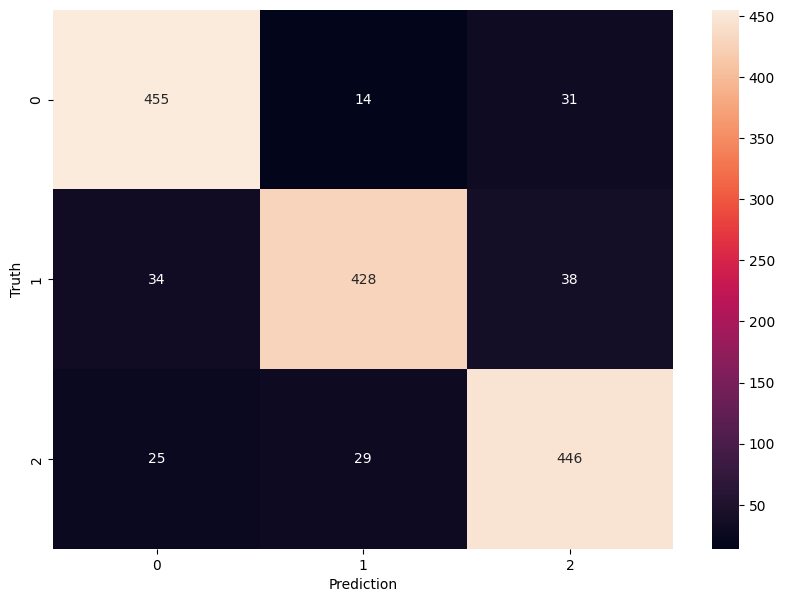

In [22]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')